In [1]:
%matplotlib inline
plt.style.use('hagen_default')

In [2]:
import xarray as xr

/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


In [3]:
from atmPy.data_archives import arm

In [4]:
# fname = '/Volumes/HTelg_4TB_Backup/arm_data/SGP/noaaaosavgC1.b0/sgpnoaaaosavgC1.b0.20000101.000000.cdf'
fname = '/Volumes/HTelg_4TB_Backup/arm_data/SGP/noaaaosavgC1.b0/'

In [5]:
bla = arm.read_noaaaos(fname, 
                       in_time_window=('2000-01-01 00:00:00', '2001-01-01 00:00:00'),
#                        verbose = True
                      )

In [6]:
corr = bla.nephelometer_1um.scattering_coeff.correlate_to(bla.nephelometer_10um.scattering_coeff, data_column='550 nm', correlant_column='550 nm')

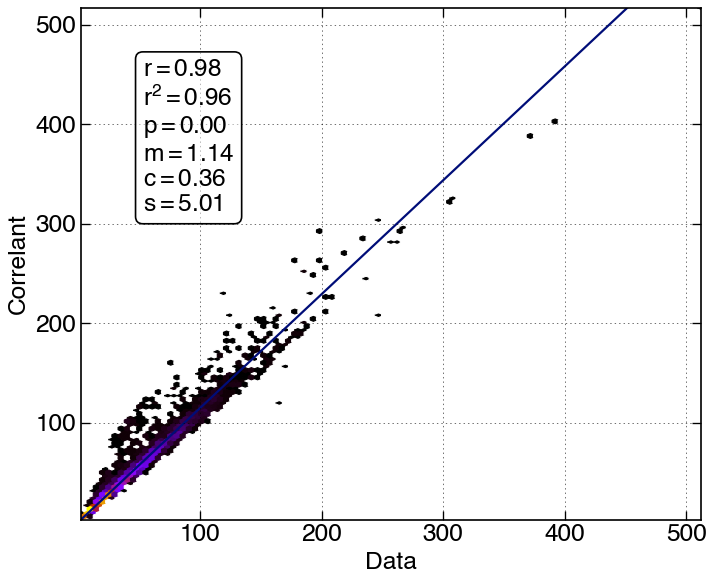

In [9]:
a, hb = corr.plot_regression(reg_type='odr',
#                              fit_res_kwargs = {'show_params': ['r','r2','p','m', 'c', 's']}
                            )
cmap = plt.cm.gnuplot
cmap.set_under([1,1,1])
hb.set_cmap(cmap)
hb.set_clim(0.1)

In [31]:
if {}:
    print('bla')

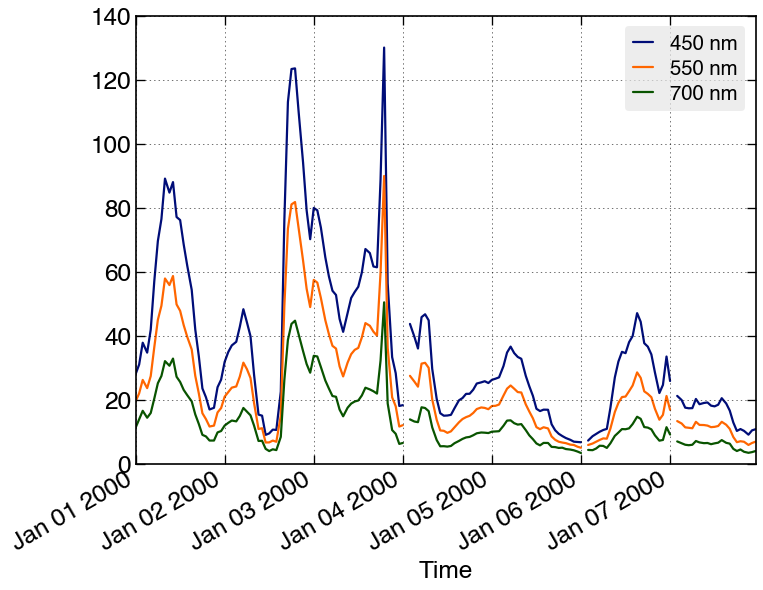

In [6]:
a = bla.nephelometer_1um.scattering_coeff.plot()


In [43]:
fname = '/Volumes/HTelg_4TB_Backup/arm_data/SGP/noaaaosavgC1.b0/sgpnoaaaosavgC1.b0.20070101.000000.cdf'

In [44]:
ds = xr.open_dataset(fname)

In [87]:
ds.Bs

<xarray.Dataset>
Dimensions:                      (time: 24)
Coordinates:
  * time                         (time) datetime64[ns] 2007-01-01 ...
Data variables:
    base_time                    datetime64[ns] 2007-01-01
    time_offset                  (time) datetime64[ns] 2007-01-01 ...
    flags_CMDL                   (time) object b'0000' b'0000' b'0000' ...
    N_OPC_1                      (time) float32 -9999.0 -9999.0 -9999.0 ...
    N_CPC_1                      (time) float32 2318.0 5713.0 7070.0 6628.0 ...
    Ba_G_Dry_10um_PSAP1W_1       (time) float32 0.7193 0.7754 0.8533 1.028 ...
    Bs_B_Dry_10um_Neph3W_1       (time) float32 22.88 21.85 22.05 26.11 ...
    Bs_G_Dry_10um_Neph3W_1       (time) float32 14.52 14.17 14.75 18.55 ...
    Bs_R_Dry_10um_Neph3W_1       (time) float32 7.74 8.104 9.309 11.06 9.851 ...
    Bbs_B_Dry_10um_Neph3W_1      (time) float32 2.715 2.74 1.807 2.413 3.022 ...
    Bbs_G_Dry_10um_Neph3W_1      (time) float32 1.655 2.15 1.99 2.414 2.004 ...
    Bbs

In [77]:
import atmPy.general.timeseries as timeseries

In [90]:
noaaaos = read_noaaaos(fname)

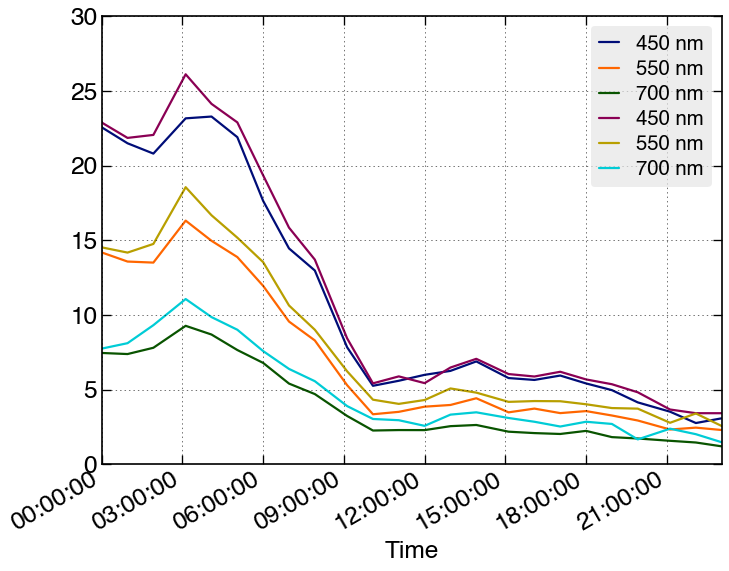

In [91]:
f,a = plt.subplots()
noaaaos.nephelometer_1um.scattering_coeff.plot(ax = a)
noaaaos.nephelometer_10um.scattering_coeff.plot(ax = a)

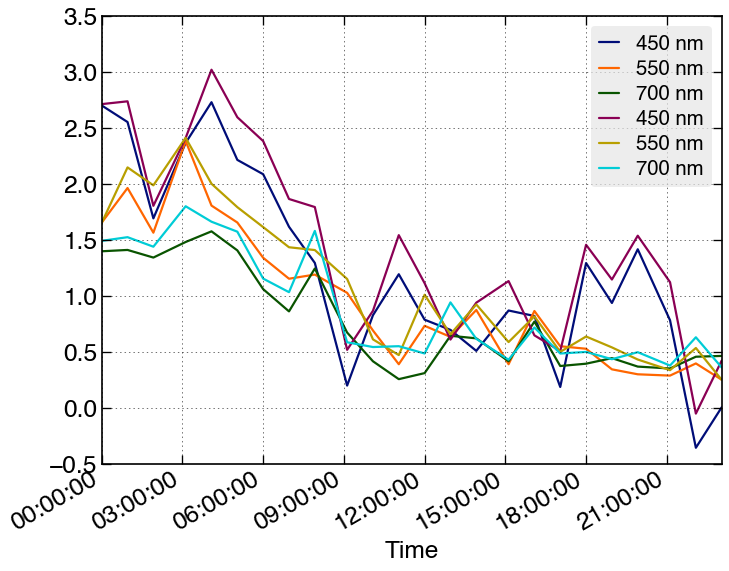

In [92]:
f,a = plt.subplots()
noaaaos.nephelometer_1um.hemisphericbackscatt_coeff.plot(ax = a)
noaaaos.nephelometer_10um.hemisphericbackscatt_coeff.plot(ax = a)

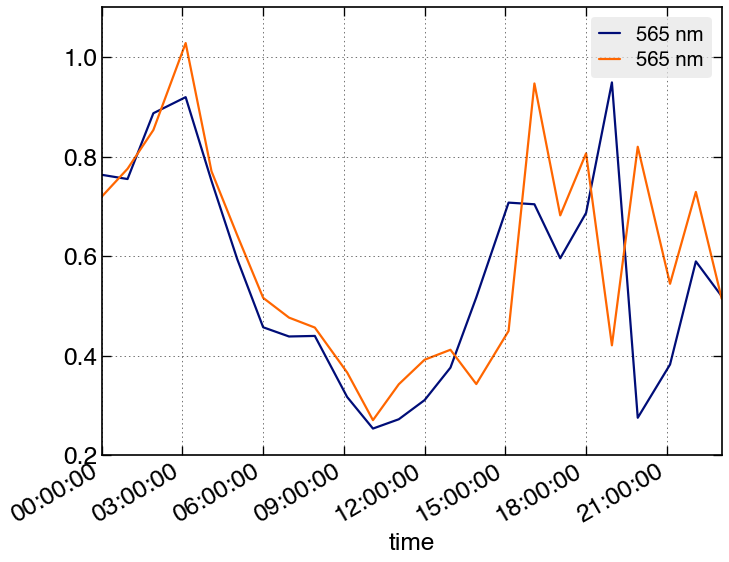

In [93]:
f,a= plt.subplots()
noaaaos.psap_1um.absorbtion_coeff.data.plot(ax = a)
noaaaos.psap_10um.absorbtion_coeff.data.plot(ax = a)

In [89]:
def read_noaaaos(fname, keep_xr_dataset = False):
    noaaaos = Noaaaos()

    noaaaos.nephelometer_1um = Nephelometer()
    noaaaos.nephelometer_10um = Nephelometer()
    noaaaos.psap_1um = FilterBasedAbsorbtion()
    noaaaos.psap_10um = FilterBasedAbsorbtion()


    def get_scatt_coeff(ds):
        df = pd.DataFrame()
        df['450 nm'] = ds.Bs_B_Dry_1um_Neph3W_1.to_pandas()
        df['550 nm'] = ds.Bs_G_Dry_1um_Neph3W_1.to_pandas()
        df['700 nm'] = ds.Bs_R_Dry_1um_Neph3W_1.to_pandas()
        scatt_coeff_1um_dry = df

        df = pd.DataFrame()
        df['450 nm'] = ds.Bs_B_Dry_10um_Neph3W_1.to_pandas()
        df['550 nm'] = ds.Bs_G_Dry_10um_Neph3W_1.to_pandas()
        df['700 nm'] = ds.Bs_R_Dry_10um_Neph3W_1.to_pandas()
        scatt_coeff_10um_dry = df
        return scatt_coeff_1um_dry, scatt_coeff_10um_dry

    def get_scatt_coeff_variability(ds):
        df = pd.DataFrame()
        df['450 nm'] = ds.Bs_B_1um_PSAP1W_1_std.to_pandas()
        df['550 nm'] = ds.Bs_G_1um_PSAP1W_1_std.to_pandas()
        df['700 nm'] = ds.Bs_R_1um_PSAP1W_1_std.to_pandas()
        scatt_coeff_1um_dry = df

        df = pd.DataFrame()
        df['450 nm'] = ds.Bs_B_Dry_10um_PSAP1W_1_std.to_pandas()
        df['550 nm'] = ds.Bs_G_Dry_10um_PSAP1W_1_std.to_pandas()
        df['700 nm'] = ds.Bs_R_Dry_10um_PSAP1W_1_std.to_pandas()
        scatt_coeff_10um_dry = df
        return scatt_coeff_1um_dry, scatt_coeff_10um_dry

    def get_hembackscatt(ds):
        df = pd.DataFrame()
        df['450 nm'] = ds.Bbs_B_Dry_1um_Neph3W_1.to_pandas()
        df['550 nm'] = ds.Bbs_G_Dry_1um_Neph3W_1.to_pandas()
        df['700 nm'] = ds.Bbs_R_Dry_1um_Neph3W_1.to_pandas()
        scatt_coeff_1um_dry = df

        df = pd.DataFrame()
        df['450 nm'] = ds.Bbs_B_Dry_10um_Neph3W_1.to_pandas()
        df['550 nm'] = ds.Bbs_G_Dry_10um_Neph3W_1.to_pandas()
        df['700 nm'] = ds.Bbs_R_Dry_10um_Neph3W_1.to_pandas()
        scatt_coeff_10um_dry = df
        return scatt_coeff_1um_dry, scatt_coeff_10um_dry

    if type(fname) == str:
        fname = [fname]

    neph_scatt_coeff_1um = []
    neph_scatt_coeff_10um = []
    neph_scatt_coeff_1um_std = []
    neph_scatt_coeff_10um_std = []
    neph_back_scatt_coeff_1um = []
    neph_back_scatt_coeff_10um = []
    neph_RH = []
    psap_abs_1um = []
    psap_abs_10um = []
    for fn in fname:
        ds = xr.open_dataset(fn)
        sc1, sc10 = get_scatt_coeff(ds)
        neph_scatt_coeff_1um.append(sc1)
        neph_scatt_coeff_10um.append(sc10)

        sc1, sc10 = get_scatt_coeff_variability(ds)
        neph_scatt_coeff_1um_std.append(sc1)
        neph_scatt_coeff_10um_std.append(sc10)

        sc1, sc10 = get_hembackscatt(ds)
        neph_back_scatt_coeff_1um.append(sc1)
        neph_back_scatt_coeff_10um.append(sc10)

        df = pd.DataFrame()
        df['565 nm'] = ds.Ba_G_Dry_1um_PSAP1W_1.to_pandas()
        psap_abs_1um.append(df)

        df = pd.DataFrame()
        df['565 nm'] = ds.Ba_G_Dry_10um_PSAP1W_1.to_pandas()
        psap_abs_10um.append(df)

    noaaaos.nephelometer_1um.scattering_coeff = timeseries.TimeSeries(pd.concat(neph_scatt_coeff_1um).sort_index())
    noaaaos.nephelometer_10um.scattering_coeff = timeseries.TimeSeries(pd.concat(neph_scatt_coeff_10um).sort_index())
    noaaaos.nephelometer_1um.scattering_coeff.standard_diviation = timeseries.TimeSeries(pd.concat(neph_scatt_coeff_1um).sort_index())
    noaaaos.nephelometer_10um.scattering_coeff.standard_diviation = timeseries.TimeSeries(pd.concat(neph_scatt_coeff_10um).sort_index())

    noaaaos.nephelometer_1um.hemisphericbackscatt_coeff = timeseries.TimeSeries(pd.concat(neph_back_scatt_coeff_1um).sort_index())
    noaaaos.nephelometer_10um.hemisphericbackscatt_coeff = timeseries.TimeSeries(pd.concat(neph_back_scatt_coeff_10um).sort_index())

    noaaaos.psap_1um.absorbtion_coeff = timeseries.TimeSeries(pd.concat(psap_abs_1um).sort_index())
    noaaaos.psap_10um.absorbtion_coeff = timeseries.TimeSeries(pd.concat(psap_abs_10um).sort_index())
    if keep_xr_dataset:
        noaaaos.xr_dataset = ds
    return noaaaos


In [94]:
class Noaaaos(object):
    def __init__(self):
        self._nephelometer_1um = None
        self._nephelometer_10um = None
        self._psap_1um = None
        self._psap_10um = None
        self._cpc = None
    
    @property 
    def psap_1um(self):
        return self._psap_1um
    
    @psap_1um.setter
    def psap_1um(self, value):
        self._psap_1um = value
        
    @property 
    def psap_10um(self):
        return self._psap_10um
    
    @psap_10um.setter
    def psap_10um(self, value):
        self._psap_10um = value
        
    @property 
    def cpc(self):
        return self._cpc
    
    @cpc.setter
    def cpc(self, value):
        self._cpc = value
        
class FilterBasedAbsorbtion(object):
    def __init__(self):
        self._absorbtion_coeff = None
        
    @property
    def absorbtion_coeff(self):
        return self._absorbtion_coeff

    @absorbtion_coeff.setter
    def absorbtion_coeff(self, value):
        self._absorbtion_coeff = value

class Nephelometer(object):
    def __init__(self):
#         self._absorbtion_coeff = None
        self._scattering_coeff = None
        self._hemisphericbackscatt_coeff = None
        self._RH_in_instrument = None
        

        
    @property
    def scattering_coeff(self):
        return self._scattering_coeff
    
    @scattering_coeff.setter
    def scattering_coeff(self, value):
        self._scattering_coeff = value
        
    @property
    def hemisphericbackscatt_coeff(self):
        return self._hemisphericbackscatt_coeff
    
    @hemisphericbackscatt_coeff.setter
    def hemisphericbackscatt_coeff(self, value):
        self._hemisphericbackscatt_coeff = value
        
    @property
    def RH_in_instrument(self):
        return self._RH_in_instrument
    
    @RH_in_instrument.setter
    def RH_in_instrument(self, value):
        self._RH_in_instrument = value
        
class TandemNephelometer(object):
    def __init__(self):
        self._nephelometer_dry = None
        self._nephelometer_wet = None


# File Structure

In [10]:
fname = '/Volumes/HTelg_4TB_Backup/arm_data/SGP/noaaaosavgC1.b0/sgpnoaaaosavgC1.b0.20000101.000000.cdf'

In [11]:
ds = xr.open_dataset(fname)

In [18]:
ds.time.long_name

'Time offset from midnight'